In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv files
university_students_df = pd.read_csv('Factors_ affecting_ university_student_grades_dataset.csv')
largest_problem_df = pd.read_csv('Largest_Problematic_Internet_Usage_Dataset (1).csv')

In [3]:
# Replace Null values with the mode each column 
def remove_missing_data(my_dataframe):
    # Note: changes are saved in the original variable
    for col in university_students_df.columns: 
        university_students_df[col].replace({pd.NA: university_students_df[col].mode()[0],
                                         None: university_students_df[col].mode()[0],
                                         np.nan: university_students_df[col].mode()[0],
                                         'Unknown': university_students_df[col].mode()[0],
                                         'None': university_students_df[col].mode()[0]
                                        },inplace = True)

In [4]:
# Remove missing values from university_students_df
remove_missing_data(university_students_df)

In [5]:
university_students_df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,Yes,No,Visual,Yes,Yes,Low,2.0,Low,B
1,21.0,M,Some College,60000.0,A,79.0,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,B
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,Visual,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,Yes,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,F,Some College,40000.0,C,89.0,High,15.0,Medicine,Public,...,Positive,No,No,Auditory,Yes,Yes,Medium,3.0,High,B


In [6]:
largest_problem_df.head()

,Age,PhysicalActivity,ScreenTime,SleepDuration,ParentalControl,SocialEngagement,GradePerformance,MentalHealthScore,ProblematicUsage
0,14,54.106946,215.109214,7.469322,0,56,58.970737,39.036791,1
1,11,67.215756,243.191306,7.121232,0,59,87.863130,41.007113,1
2,15,35.137199,282.393641,7.164853,1,96,68.456983,65.932327,0
3,12,76.216540,294.945436,7.746564,0,43,76.467248,34.314328,0
4,14,55.215514,267.442285,8.060050,0,76,79.470783,48.402224,1


In [7]:
# Change ScreenTime and physical activity to show data in minutes
largest_problem_df['PhysicalActivity'] = largest_problem_df['PhysicalActivity']/60
largest_problem_df['ScreenTime'] = largest_problem_df['ScreenTime']/60

In [8]:
# remove any whitespace from object type columns
for col in university_students_df.columns:
    if university_students_df[col].dtype == 'O':
        university_students_df[col] = university_students_df[col].str.strip()  

In [9]:
# change all columns with numerical values into float type
# only for university_
for col in university_students_df.columns: 
    if col.lower() == 'age':
        university_students_df[col] = university_students_df[col].astype(int)  
    elif university_students_df[col].dtype =='object':  
        if list(university_students_df[col].sort_values())[0][0].isdigit():
            university_students_df[col] = university_students_df[col].astype(float)

In [10]:
# Create Bins
largest_problem_df['AgeBin'] = pd.cut(
    largest_problem_df['Age'], bins=[7,11,14,17], labels=['8-11','12-14','15-17'])

university_students_df['AgeBin'] = pd.cut(
    university_students_df.Age, bins=[17,20,22], labels=['18-20', '21-22'])

In [11]:
# Remove "_" from column names for university df
university_students_df.columns = university_students_df.columns.str.replace('_', '')

#### Convert the Grades according to this rule

<= 60 F

61-70 = D

71-80 = C 

81-90 = B 

=> 91 = A

In [12]:
grade_list = []
for grade in largest_problem_df['GradePerformance']:
    if grade > 25 and grade <= 60: 
        grade_list.append('F')
    elif grade > 60 and grade <= 70: 
        grade_list.append('D')
    elif grade > 70 and grade <= 80:
        grade_list.append('C')
    elif grade > 80 and grade <= 90:
        grade_list.append('B')
    else: 
        grade_list.append('A') 

# update grade columns
largest_problem_df['GradePerformance'] = grade_list

In [13]:
# change PhysicalActivity in young student df colum to categorical 
physical_activity = []
for value in largest_problem_df['PhysicalActivity']: 
    if value < 1: 
        physical_activity.append('Low')
    elif value >= 1 and value <= 1.5: 
        physical_activity.append('Medium')
    else: 
        physical_activity.append('High')
# update physical Activity column 
largest_problem_df['PhysicalActivity'] = physical_activity

In [14]:
# Rename some columns, in this case we will rename the one with fewest columns for simplicity
# We need to rename the columns so we can concat the two datasets
largest_problem_df.rename(columns = 
                          {'SleepDuration': 'SleepPatterns',
                           'GradePerformance': 'Grades'},
                          inplace = True
                         )                          

In [15]:
# sort columns alphabetically for both dfs
university_students_df = university_students_df[sorted(university_students_df.columns)]
largest_problem_df = largest_problem_df[sorted(largest_problem_df.columns)]

In [16]:
# Concatenate  the two dfs
final_df = pd.concat([largest_problem_df,university_students_df], ignore_index = True)
final_df.tail()

,Age,AgeBin,Grades,MentalHealthScore,ParentalControl,PhysicalActivity,ProblematicUsage,ScreenTime,SleepPatterns,SocialEngagement,...,ProfessorQuality,SchoolEnvironment,SchoolType,SelfEsteem,SportsParticipation,StressLevels,StudyHours,StudySpace,TimeWastedonSocialMedia,Tutoring
1010059,20,18-20,B,NaN,NaN,High,NaN,6.0,7.0,NaN,...,Medium,Positive,Private,Medium,Low,High,16.0,Yes,3.0,No
1010060,19,18-20,A,NaN,NaN,Low,NaN,3.0,7.0,NaN,...,High,Neutral,Public,Medium,High,Low,5.0,Yes,4.0,Yes
1010061,20,18-20,A,NaN,NaN,Low,NaN,10.0,4.0,NaN,...,Low,Negative,Public,Low,High,Low,7.0,Yes,3.0,No
1010062,21,21-22,A,NaN,NaN,High,NaN,5.0,8.0,NaN,...,Medium,Negative,Public,Low,Medium,High,15.0,No,4.0,Yes
1010063,18,18-20,B,NaN,NaN,High,NaN,5.0,7.0,NaN,...,Low,Positive,Public,Low,Low,Medium,16.0,Yes,3.0,No


In [17]:
final_df.head()

,Age,AgeBin,Grades,MentalHealthScore,ParentalControl,PhysicalActivity,ProblematicUsage,ScreenTime,SleepPatterns,SocialEngagement,...,ProfessorQuality,SchoolEnvironment,SchoolType,SelfEsteem,SportsParticipation,StressLevels,StudyHours,StudySpace,TimeWastedonSocialMedia,Tutoring
0,14,12-14,F,39.036791,0.0,Low,1.0,3.585154,7.469322,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,8-11,B,41.007113,0.0,Medium,1.0,4.053188,7.121232,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,15-17,D,65.932327,1.0,Low,0.0,4.706561,7.164853,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,12-14,C,34.314328,0.0,Medium,0.0,4.915757,7.746564,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,12-14,C,48.402224,0.0,Low,1.0,4.457371,8.060050,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
final_df['AgeBin'].value_counts()

AgeBin
8-11     400395
12-14    300261
15-17    299344
18-20      6418
21-22      3646
Name: count, dtype: int64

In [19]:
# sort by Age
final_df = final_df.sort_values(by='AgeBin')
final_df.head()

,Age,AgeBin,Grades,MentalHealthScore,ParentalControl,PhysicalActivity,ProblematicUsage,ScreenTime,SleepPatterns,SocialEngagement,...,ProfessorQuality,SchoolEnvironment,SchoolType,SelfEsteem,SportsParticipation,StressLevels,StudyHours,StudySpace,TimeWastedonSocialMedia,Tutoring
0,14,12-14,F,39.036791,0.0,Low,1.0,3.585154,7.469322,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786092,14,12-14,C,46.166514,1.0,Medium,0.0,4.719149,12.000000,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336826,14,12-14,B,41.167099,0.0,Medium,0.0,5.611430,8.696852,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336824,12,12-14,B,59.452222,0.0,Medium,0.0,4.128236,8.912359,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336823,14,12-14,F,31.327544,0.0,Medium,0.0,5.506778,7.554274,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# group df by Age groups(AgeBin) and compute the average for sleep patters
grouped = final_df.groupby('AgeBin')['SleepPatterns'].mean().reset_index()
grouped.head()


,AgeBin,SleepPatterns
0,12-14,7.993405
1,15-17,7.998688
2,18-20,6.781240
3,21-22,6.798135
4,8-11,7.999426


In [21]:
# Group df by age group and physical activity level
grouped = final_df.groupby(['AgeBin', 'PhysicalActivity'])['SleepPatterns'].mean()
grouped

AgeBin  PhysicalActivity
12-14   High                8.015698
        Low                 7.992768
        Medium              7.993001
15-17   High                7.985038
        Low                 8.002552
        Medium              7.995287
18-20   High                6.778170
        Low                 6.785013
        Medium              6.781508
21-22   High                6.736064
        Low                 6.780759
        Medium              6.901487
8-11    High                8.005465
        Low                 8.000425
        Medium              7.998088
Name: SleepPatterns, dtype: float64

In [22]:
# grouped data has a multi-index series, we can pivot inner index into columns
df = grouped.unstack()
df


PhysicalActivity,High,Low,Medium
AgeBin,,,
12-14,8.015698,7.992768,7.993001
15-17,7.985038,8.002552,7.995287
18-20,6.778170,6.785013,6.781508
21-22,6.736064,6.780759,6.901487
8-11,8.005465,8.000425,7.998088


In [23]:
# AgeBin index is out of order, we can use pandas reindex method to reorder it
age_order = ['8-11', '12-14', '15-17', '18-20', '21-22']
df = df.reindex(age_order)
df

PhysicalActivity,High,Low,Medium
AgeBin,,,
8-11,8.005465,8.000425,7.998088
12-14,8.015698,7.992768,7.993001
15-17,7.985038,8.002552,7.995287
18-20,6.778170,6.785013,6.781508
21-22,6.736064,6.780759,6.901487


In [24]:
# testing f string method
f"{df['High'].iloc[0]:.3f}"

'8.005'

### Stacked Bar Chart

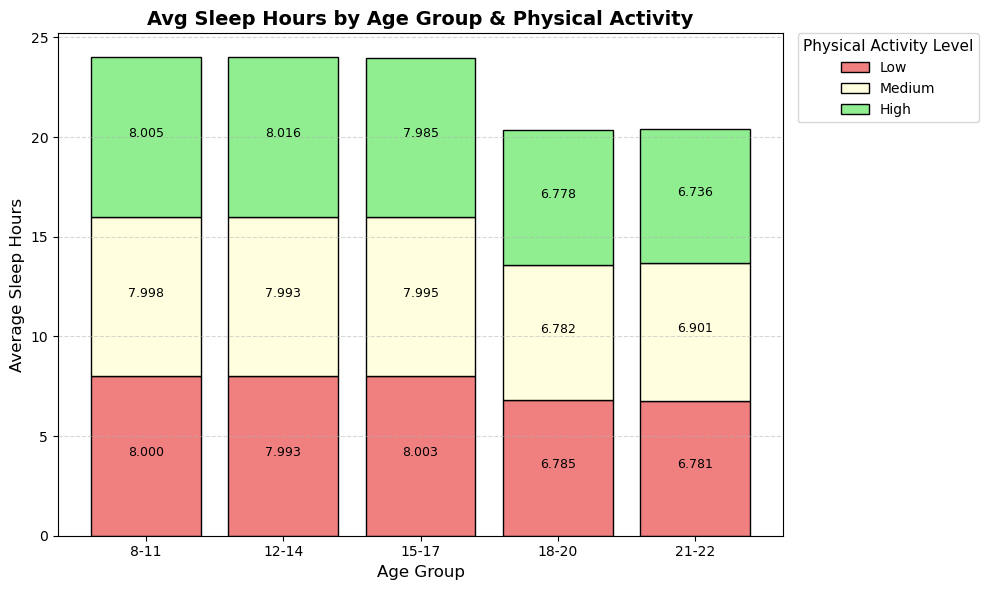

In [25]:
# REFERENCE: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

# Set up plot
x = np.arange(len(df))
width = 0.6  # wider bar since we're stacking

# For colors, use the same color dictionary declared above
plt.figure(figsize=(10, 6))

# Calculate bottoms for stacking
bottom_low = df['Low']
bottom_medium = bottom_low + df['Medium']

# Colors
colors = {
    'Low': 'lightcoral',     # Light Red
    'Medium': 'lightyellow', # Light Yellow
    'High': 'lightgreen' }    # Light Green

# Plot bars
plt.bar(df.index, df['Low'], label='Low', color=colors['Low'], edgecolor='black')
plt.bar(df.index, df['Medium'], bottom=bottom_low, label='Medium', color=colors['Medium'], edgecolor='black')
plt.bar(df.index, df['High'], bottom=bottom_medium, label='High', color=colors['High'], edgecolor='black')

# Add 3-decimal labels in the center of each segment
for i in range(len(df)):
    plt.text(i, df['Low'].iloc[i] / 2, f"{df['Low'].iloc[i]:.3f}", ha='center', fontsize=9) # diving by 2 places label in the middle
    plt.text(i, bottom_low.iloc[i] + df['Medium'].iloc[i] / 2, f"{df['Medium'].iloc[i]:.3f}", ha='center', fontsize=9)
    plt.text(i, bottom_medium.iloc[i] + df['High'].iloc[i] / 2, f"{df['High'].iloc[i]:.3f}", ha='center', fontsize=9)

# Formatting
plt.title('Avg Sleep Hours by Age Group & Physical Activity', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Sleep Hours', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend placed outside to avoid overlap
plt.legend(
    title='Physical Activity Level',
    fontsize=10,
    title_fontsize=11,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [26]:
# Check average screen time by grade
avg_screen_time = final_df.groupby('Grades')['ScreenTime'].mean().round(2).sort_index()
print(avg_screen_time)

Grades
A    4.10
B    4.04
C    4.02
D    4.00
F    4.00
Name: ScreenTime, dtype: float64


### Box Plot

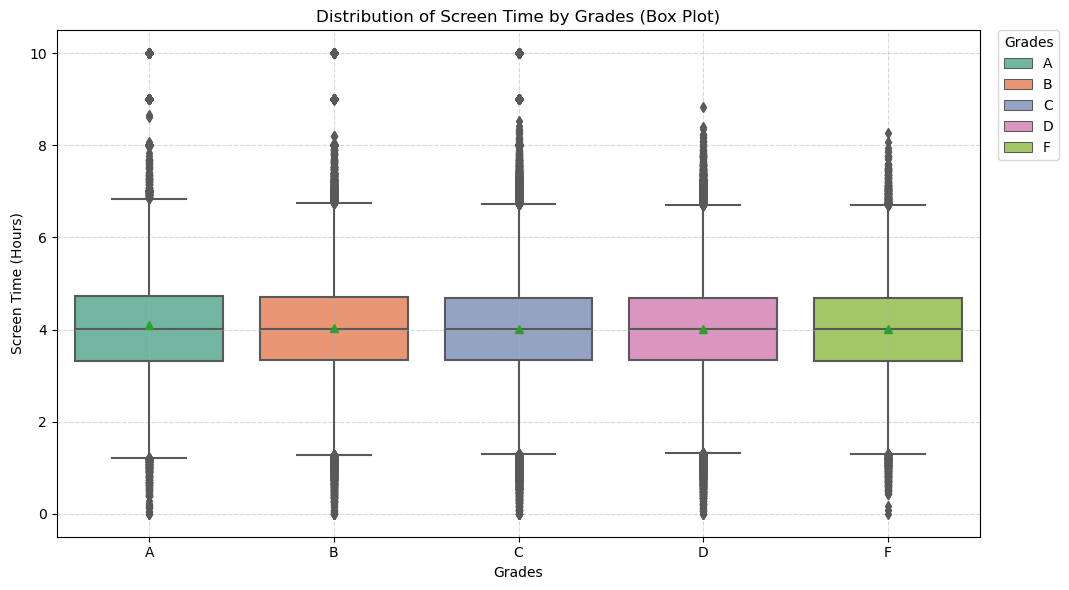

In [27]:
final_df = final_df.sort_values('Grades')
plt.figure(figsize=(10, 6))

# Box plot of Screen Time grouped by Grades
sns.boxplot(data=final_df, x='Grades', y='ScreenTime', palette='Set2',dodge=False, order=['A', 'B', 'C', 'D', 'F'],hue='Grades', showmeans=True)

# Chart titles and labels
plt.title('Distribution of Screen Time by Grades (Box Plot)')
plt.xlabel('Grades')
plt.ylabel('Screen Time (Hours)')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
# Clean legend placement
plt.legend(title='Grades', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()




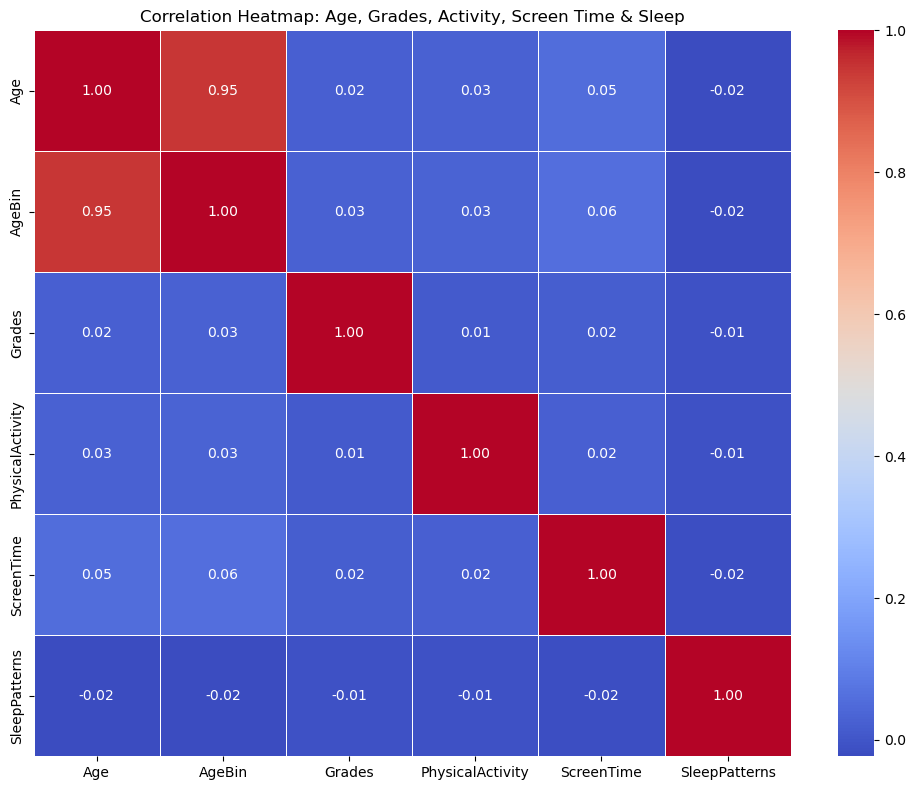

In [28]:
# REFERENCE:    https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans
#               https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html
#               https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Select relevant columns and map grades & physical activity to numeric
df_corr = final_df[['Age', 'AgeBin', 'Grades', 'PhysicalActivity', 'ScreenTime', 'SleepPatterns']].copy()

# Mapping categorical to numeric for correlation calculation
# Correllation relies stricktly on numerical values
grade_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
activity_map = {'High': 3, 'Medium': 2, 'Low': 1}
agebin_map = {'8-11': 1, '12-14': 2, '15-17': 3, '18-20': 4, '21-22': 5}

df_corr['Grades'] = df_corr['Grades'].map(grade_map)
df_corr['PhysicalActivity'] = df_corr['PhysicalActivity'].map(activity_map)
df_corr['AgeBin'] = df_corr['AgeBin'].map(agebin_map)

# Drop missing values
df_corr = df_corr.dropna()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Age, Grades, Activity, Screen Time & Sleep")
plt.tight_layout()
plt.show()


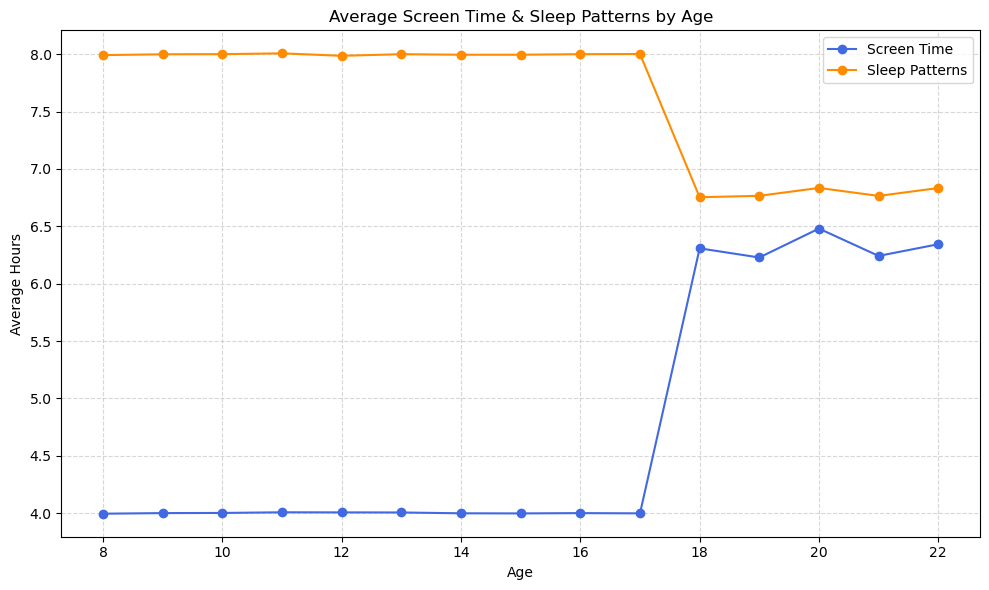

In [29]:
# Group by Age and calculate averages
avg_data = final_df.groupby('Age')[['ScreenTime', 'SleepPatterns']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_data['Age'], avg_data['ScreenTime'], label='Screen Time', color='royalblue', marker='o')
plt.plot(avg_data['Age'], avg_data['SleepPatterns'], label='Sleep Patterns', color='darkorange', marker='o')

# Labels
plt.title('Average Screen Time & Sleep Patterns by Age')
plt.xlabel('Age')
plt.ylabel('Average Hours')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [30]:
# Group and normalize (same prep as stacked bar chart)
grade_age_counts = final_df.groupby(['Age', 'Grades']).size().unstack(fill_value=0)
grade_age_counts.head()

Grades,A,B,C,D,F
Age,,,,,
8,6683,24289,38131,24375,6636
9,6809,24089,38136,24284,6731
10,6638,24391,38488,24108,6630
11,6691,24147,38051,24331,6757
12,6639,24195,38461,24456,6731


In [31]:
(grade_age_counts.iloc[0,0]/grade_age_counts.iloc[0].sum())*100

6.675390055336916

In [32]:
# divide each element in the df by the total sum from each row
grade_age_percent = grade_age_counts.div(grade_age_counts.sum(axis=1), axis=0) * 100

# Sort age
grade_age_percent = grade_age_percent.sort_index()
grade_age_percent


Grades,A,B,C,D,F
Age,,,,,
8,6.675390,24.261342,38.087580,24.347244,6.628444
9,6.805665,24.077202,38.117323,24.272107,6.727703
10,6.621116,24.328961,38.390105,24.046681,6.613137
11,6.692539,24.152555,38.059754,24.336597,6.758554
12,6.607154,24.078940,38.276507,24.338688,6.698712
13,6.722033,24.286572,38.229938,23.954373,6.807084
14,6.770901,24.143872,38.422861,23.881449,6.780917
15,6.746657,24.059230,38.542722,24.081301,6.570090
16,6.623373,23.957989,38.427387,24.256637,6.734614


### Line Graphs

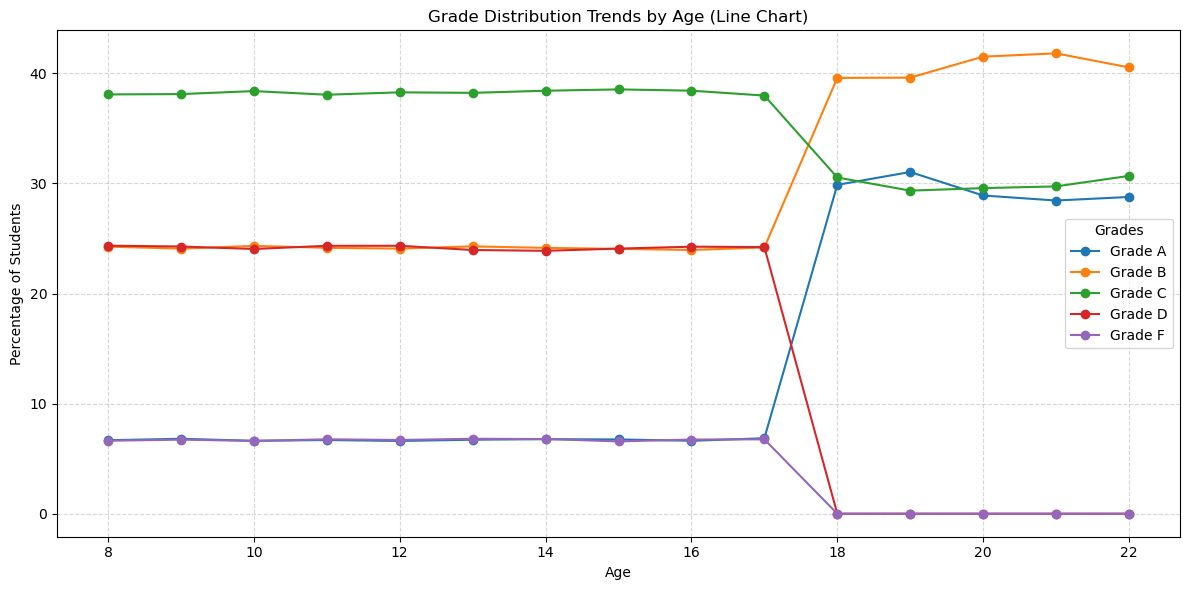

In [33]:
# Plot
plt.figure(figsize=(12, 6))
for grade in grade_age_percent.columns:
    plt.plot(grade_age_percent.index, grade_age_percent[grade], label=f'Grade {grade}', marker='o')

plt.title('Grade Distribution Trends by Age (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Percentage of Students')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Grades')
plt.tight_layout()
plt.show()

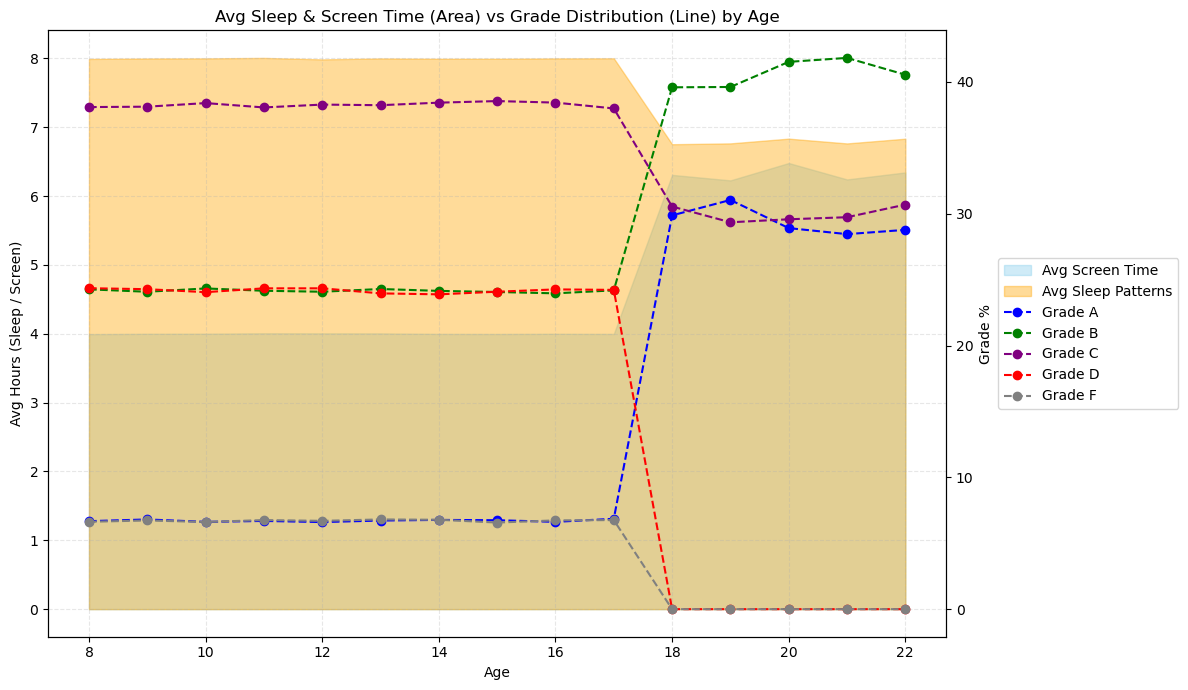

In [34]:
# REFERENCE:    https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html
#               https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html

# Group average sleep and screen time by Age
avg_values = final_df.groupby('Age')[['ScreenTime', 'SleepPatterns']].mean().reset_index()

# Grade distribution as percentages
grade_counts = final_df.groupby(['Age', 'Grades']).size().unstack(fill_value=0)
grade_percent = grade_counts.div(grade_counts.sum(axis=1), axis=0) * 100

# Create base plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Area chart for ScreenTime and SleepPatterns (Left y-axis)
ax1.fill_between(avg_values['Age'], avg_values['ScreenTime'], alpha=0.4, color='skyblue', label='Avg Screen Time')
ax1.fill_between(avg_values['Age'], avg_values['SleepPatterns'], alpha=0.4, color='orange', label='Avg Sleep Patterns')
ax1.set_ylabel("Avg Hours (Sleep / Screen)", color='black')
ax1.set_xlabel("Age")
ax1.tick_params(axis='y', labelcolor='black')

# Create second y-axis
ax2 = ax1.twinx()

# Line chart for Grade Distribution (Right y-axis)
colors = {'A': 'blue', 'B': 'green', 'C': 'purple', 'D': 'red', 'F': 'gray'}
for grade in grade_percent.columns:
    ax2.plot(grade_percent.index, grade_percent[grade], label=f'Grade {grade}', color=colors[grade], linestyle='--', marker='o')

ax2.set_ylabel("Grade %", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Legend Outside
plt.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Titles and grid
plt.title("Avg Sleep & Screen Time (Area) vs Grade Distribution (Line) by Age")
ax1.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

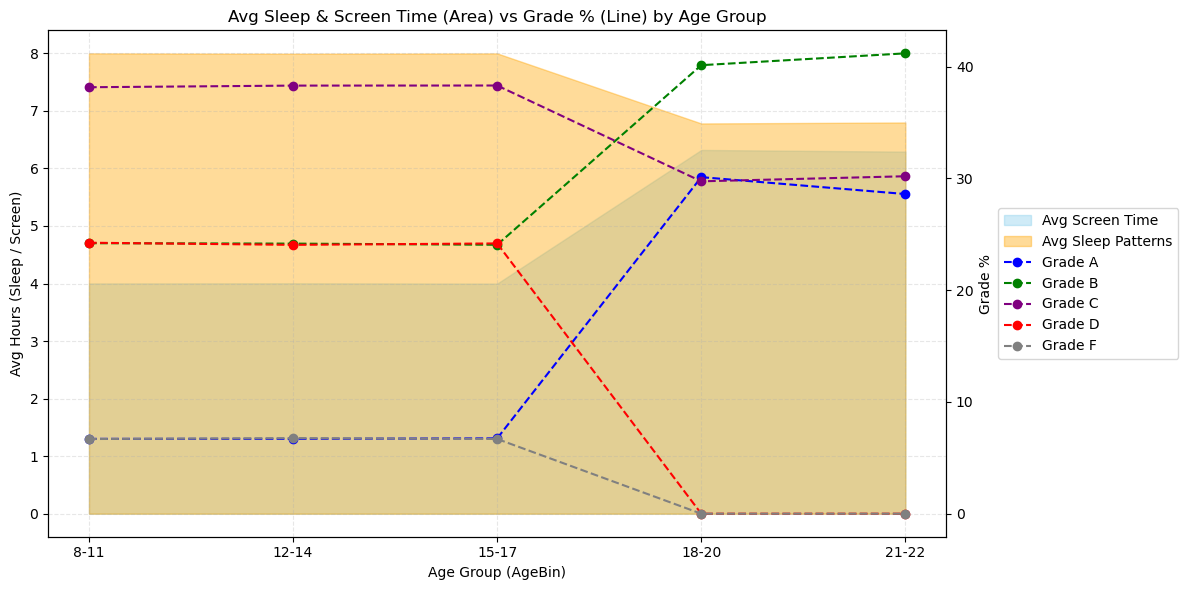

In [35]:

# Group averages by AgeBin
avg_values_bin = final_df.groupby('AgeBin')[['ScreenTime', 'SleepPatterns']].mean().reset_index()

# Grade distribution by AgeBin (in %)
grade_counts_bin = final_df.groupby(['AgeBin', 'Grades']).size().unstack(fill_value=0)
grade_percent_bin = grade_counts_bin.div(grade_counts_bin.sum(axis=1), axis=0) * 100

# Define correct order for AgeBin
age_order = ['8-11', '12-14', '15-17', '18-20', '21-22']
avg_values_bin['AgeBin'] = pd.Categorical(avg_values_bin['AgeBin'], categories=age_order, ordered=True)
avg_values_bin = avg_values_bin.sort_values('AgeBin')
grade_percent_bin = grade_percent_bin.reindex(age_order)

# Base plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Area chart: Sleep & Screen Time
ax1.fill_between(avg_values_bin['AgeBin'], avg_values_bin['ScreenTime'], alpha=0.4, color='skyblue', label='Avg Screen Time')
ax1.fill_between(avg_values_bin['AgeBin'], avg_values_bin['SleepPatterns'], alpha=0.4, color='orange', label='Avg Sleep Patterns')
ax1.set_ylabel("Avg Hours (Sleep / Screen)")
ax1.set_xlabel("Age Group (AgeBin)")
ax1.tick_params(axis='y')

# Second y-axis for grade distribution
ax2 = ax1.twinx()
colors = {'A': 'blue', 'B': 'green', 'C': 'purple', 'D': 'red', 'F': 'gray'}

for grade in grade_percent_bin.columns:
    ax2.plot(grade_percent_bin.index, grade_percent_bin[grade], label=f'Grade {grade}', color=colors[grade], linestyle='--', marker='o')

ax2.set_ylabel("Grade %")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title("Avg Sleep & Screen Time (Area) vs Grade % (Line) by Age Group")
ax1.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


---- 
---- 

### Interpreting BoxPlot

Future use: This can be used for further data cleaning and refinement of the research.  

In [36]:
grade_f = final_df.loc[final_df.Grades == 'F'][['Grades','ScreenTime']]

In [37]:
q3 = grade_f.ScreenTime.quantile(.75)
q1 = grade_f.ScreenTime.quantile(.25)
iqr  =q3-q1 
print(f"Q3: {q3}, Q1: {q1}, IQR: {iqr}")

Q3: 4.676904682573706, Q1: 3.3259861528483565, IQR: 1.3509185297253499


In [38]:
# Points above Upper Whisker
grade_f.loc[grade_f['ScreenTime']>(q3+iqr*1.5)]

,Grades,ScreenTime
234740,F,6.756214
386297,F,6.709171
317259,F,6.748507
399115,F,6.767161
316257,F,7.731164
...,...,...
118072,F,6.961860
895691,F,7.305384
961778,F,7.334588
158978,F,6.888937


In [39]:
# Points below Lower Whisker
grade_f.loc[grade_f['ScreenTime']<(q1-iqr*1.5)]

,Grades,ScreenTime
323394,F,1.281730
325198,F,0.888904
325494,F,1.034789
416098,F,1.108776
781854,F,0.932650
...,...,...
903469,F,0.633173
105184,F,1.083795
69078,F,1.014492
34000,F,1.291487
